In [0]:
f = open('data.txt', 'r')

In [0]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [0]:
raw = re.findall('(\d+/\d+/\d+, \d+:\d+) - (\w+\s?\w+?): (.*)', f.read())

In [0]:
f.close()

In [0]:
df = pd.DataFrame(raw,columns=['Date','Name','Message'])

In [0]:
for i in range(len(df['Message'])):
  if(df.loc[i,'Message']=='<Media omitted>'):
    df.loc[i,'Message'] = np.nan

In [0]:
df.dropna(axis=0,inplace=True)

In [427]:
df.reset_index()
df.isna().sum()

Date       0
Name       0
Message    0
dtype: int64

In [0]:
# df['Name'].value_counts()

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
def data_interval():
  initial = df['Date'][0]
  f = len(df['Date'])
  final = df['Date'][f-1]
  print('Data is taken for an period of {} days'.format((final - initial).days))

In [431]:
data_interval()

Data is taken for an period of 323 days


In [0]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [0]:
a = df.groupby(['Year','Month'])

In [0]:
index = a['Message'].count().index
values = a['Message'].count().values
mY = pd.DataFrame(values,index=index,columns=['Message_Count'])

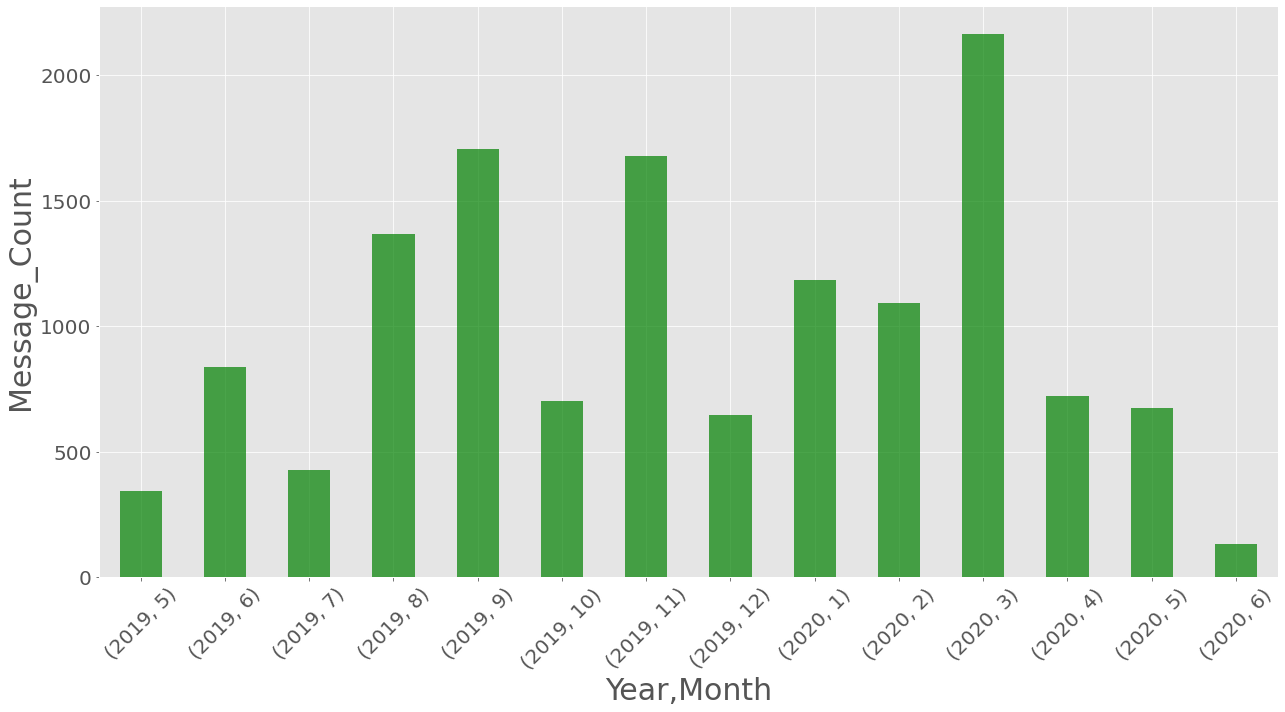

In [476]:
plt.figure(figsize=(18,10),frameon=False)
plt.style.use('ggplot')
mY['Message_Count'].plot(kind='bar', fontsize = 20, rot = 45, color='green',alpha=0.7)
plt.ylabel('Message_Count',fontsize=30)
plt.xlabel('Year,Month',fontsize=30)
plt.tight_layout()

In [0]:
top_10 = df['Name'].value_counts().index.tolist()
top_10_val = df['Name'].value_counts().tolist()

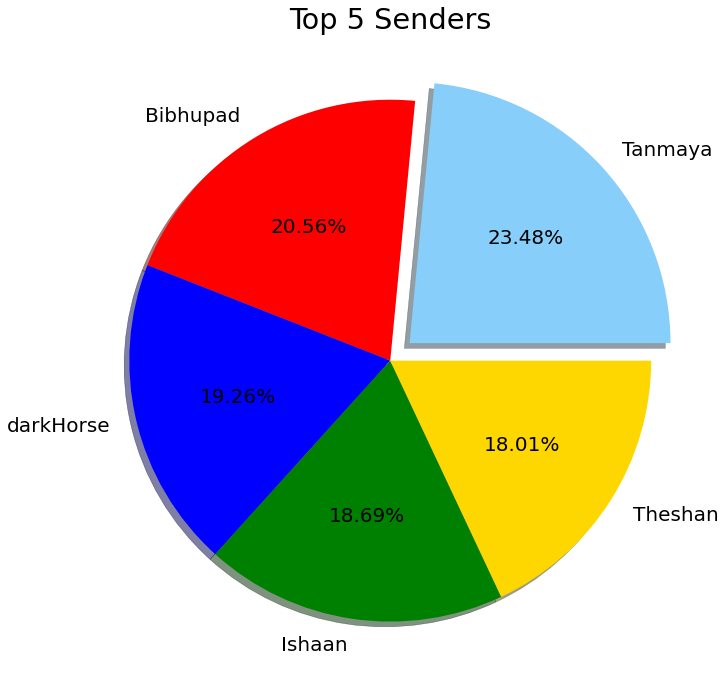

In [437]:
plt.figure(figsize=(18,12))
c = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode = (0.1,0,0,0,0)
plt.rcParams['font.size'] = 20.0
plt.pie(top_10_val[0:5],labels=top_10[0:5],autopct='%.2f%%',colors=c,explode=explode,shadow=True)
plt.title('Top 5 Senders')
plt.show()

In [0]:
b = df.groupby(['Year','Month','Day'])

In [0]:
day_index = df['Date'].dt.date.unique()
day_index_val = b['Message'].count().values

In [0]:
prophet_data = pd.DataFrame()
prophet_data['ds'] = day_index
prophet_data['y'] = day_index_val

In [0]:
prophet_data.ds = pd.to_datetime(prophet_data.ds)

In [0]:
fbp = Prophet()

In [443]:
fbp.fit(prophet_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = fbp.make_future_dataframe(periods=100)

In [0]:
forecast = fbp.predict(future)

<Figure size 1296x720 with 0 Axes>

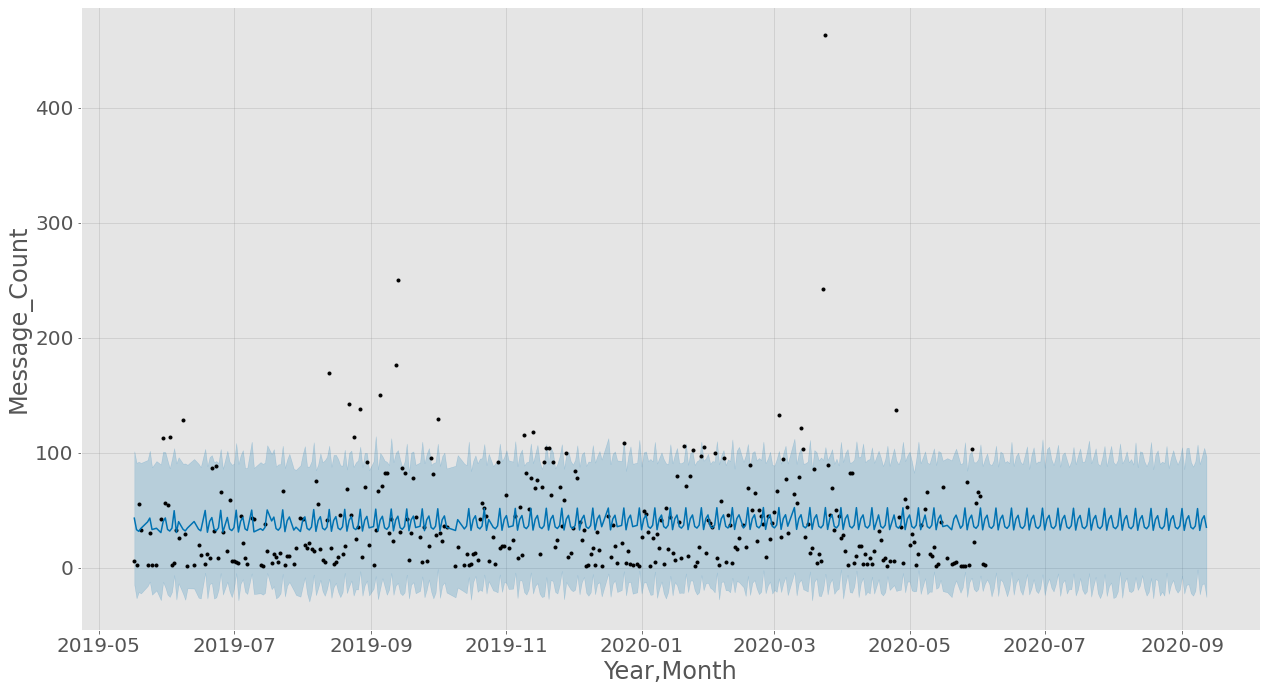

In [446]:
plt.figure(figsize=(18,10))
f = fbp.plot(forecast, xlabel='Year,Month', ylabel='Message_Count', figsize=(18,10) )
plt.show()

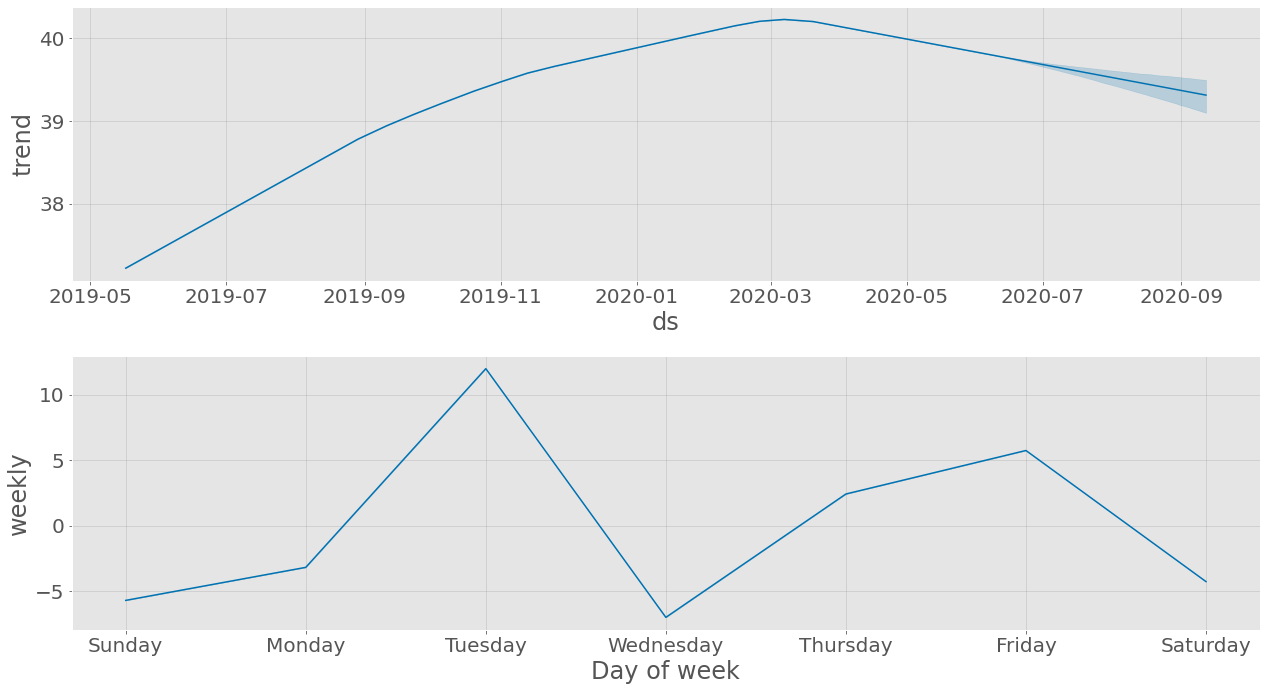

In [447]:
f1 = fbp.plot_components(forecast, figsize=(18,10))
plt.tight_layout()

In [0]:
# forecast

In [0]:
msg = ""
for i,item in enumerate(df['Message']):
  msg = msg + "".join(item)
msg = re.sub("\.+"," ",msg)
msg = re.sub("[^a-zA-Z\s+]"," ",msg)
msg = re.sub("\s+"," ",msg)

In [450]:
msg

'Happy birthday Thank You Tonyhttps www facebook com posts s https www instagram com p BxkUpsjlXus igshid phs tyhgewh interndiariesbyMM The Final Tribute is here Happy Vesak interndiariesbyMM our group leader Chinna Nuv chaala ekkuva chesthunav thaginchu electrical lab yaad hain na Han did all the job Thanks main lekin last mein jaate time wire kholta tha tu kya kiya tha Kuch bhi Hum dono ka wo duty tha I used to be extra sleepy and hated days without having coffee in the morning You both remember our epic stunt in electrical lab I don t like the sound of that especially when we were dealing with Volts SWAG Kya stunt tha Woh muje treat Diya tha Tu bhi dega naa Haan aaja Amritsar There are a lot of dope bars and restaurants hereisko Guwahati main khaane bula raha hun Guwahati mein rehke bhi nahi ata Amritsar chor de bhau PUBG se fursat miligi tab naa UK sahoo wala specially Isse bada shock laga tha Expelled from the lab Han Wait WHAT Ticket karke bhej de Tera laptop bhi toh Lana h And c

In [0]:

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
wc = WordCloud(background_color='black',stopwords=stopwords,collocations=False,colormap='magma',random_state=3).generate(msg)

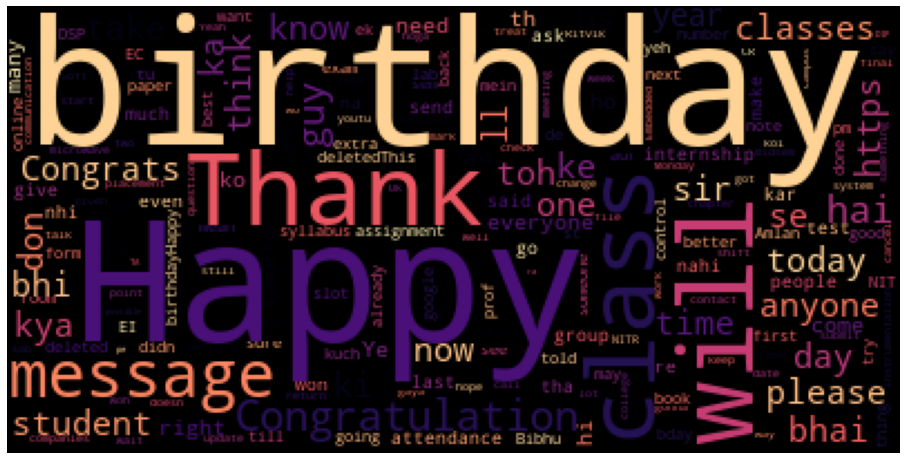

In [453]:
plt.figure(figsize=(16,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [0]:
words = msg.lower()

In [455]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [456]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = word_tokenize(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
non_comm = [word for word in text if not word in stopwords.words()]

In [0]:
# words_split = words.split()

In [0]:
words_data = pd.DataFrame(non_comm,columns=['Words'])

In [460]:
words_data.head()

,Words
0,happy
1,birthday
2,thank
3,tonyhttps
4,www


In [461]:
words_data['Words'].value_counts()

birthday           1826
happy              1754
class               319
message             308
congratulations     292
                   ... 
damages               1
necessarily           1
aaa                   1
hacknitr              1
shortlisting          1
Name: Words, Length: 10800, dtype: int64

In [0]:
most_used_words = words_data['Words'].value_counts().index.tolist()
val = words_data['Words'].value_counts().tolist()

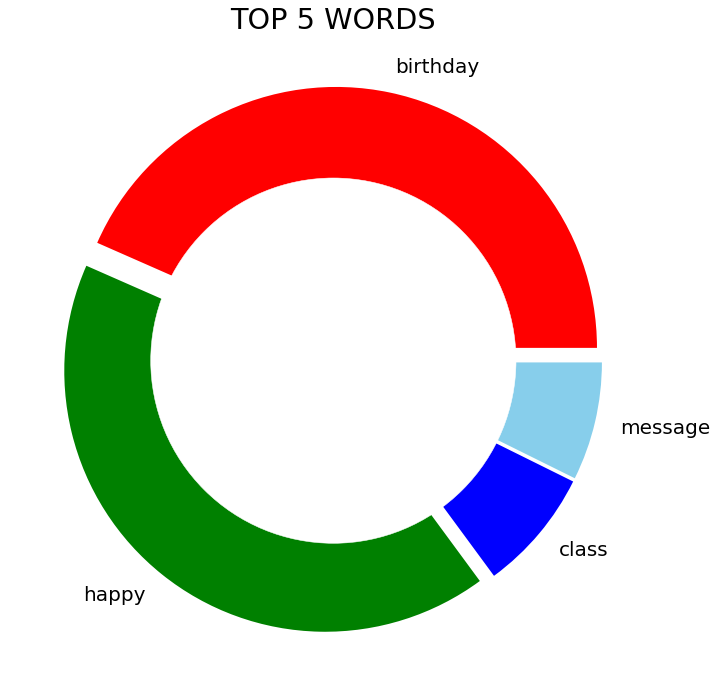

In [475]:
plt.figure(figsize=(18,12))
my_circle=plt.Circle( (0,0), 0.7, color='white')
explode1 = (0.05,0.05,0.03,0.03)
plt.pie(val[0:4], labels=most_used_words[0:4], colors=['red','green','blue','skyblue'],explode=explode1)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("TOP 5 WORDS")
plt.show()